In [45]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

In [46]:
# Load and Prepare Data

In [47]:
df = pd.read_csv('london_merged.csv', header=None,index_col=False,names=['timestamp','cnt','t1','t2','hum','wind_speed','weather_code','is_holiday','is_weekend','season'])

In [48]:
#data['weather_code'].unique()

data = df.drop("timestamp", axis=1)

data['weather_code'].unique()
weather_dict = {1 : 100,  2 : 100,  3 : 100,  4 : 100, 
                7 : 200, 10 : 200, 26 : 200, 94 : 200}
data['weather_code']=data['weather_code'].replace(weather_dict)

print(data)
data.head()

        cnt   t1   t2    hum  wind_speed  weather_code  is_holiday  \
0       cnt   t1   t2    hum  wind_speed  weather_code  is_holiday   
1       182  3.0  2.0   93.0         6.0           3.0         0.0   
2       138  3.0  2.5   93.0         5.0           1.0         0.0   
3       134  2.5  2.5   96.5         0.0           1.0         0.0   
4        72  2.0  2.0  100.0         0.0           1.0         0.0   
...     ...  ...  ...    ...         ...           ...         ...   
17410  1042  5.0  1.0   81.0        19.0           3.0         0.0   
17411   541  5.0  1.0   81.0        21.0           4.0         0.0   
17412   337  5.5  1.5   78.5        24.0           4.0         0.0   
17413   224  5.5  1.5   76.0        23.0           4.0         0.0   
17414   139  5.0  1.0   76.0        22.0           2.0         0.0   

       is_weekend  season  
0      is_weekend  season  
1             1.0     3.0  
2             1.0     3.0  
3             1.0     3.0  
4             1.0  

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
1,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
3,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
4,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0


# Checking what values columns contain

In [49]:
# I check for the columns that contain not continuous values
print(data.is_holiday.value_counts())

0.0           17030
1.0             384
is_holiday        1
Name: is_holiday, dtype: int64


In [50]:
print(data.is_weekend.value_counts())

0.0           12444
1.0            4970
is_weekend        1
Name: is_weekend, dtype: int64


In [51]:
print(data.wind_speed.value_counts())

12.0                  842
11.0                  832
14.0                  832
13.0                  828
15.0                  828
                     ... 
56.0                    1
54.0                    1
35.5                    1
2.6666666666666665      1
50.0                    1
Name: wind_speed, Length: 104, dtype: int64


# Import of libraries for scaling and splitting

In [52]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Preperation of data

Text(0, 0.5, 't2')

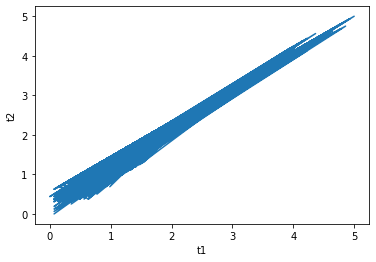

In [54]:
from matplotlib import pyplot as plt
# Features and targets 
x = data.loc[:, data.columns != 'cnt'].values # Feature
Y = data.loc[:, data.columns == 'cnt'].values #Target
#sc = preprocessing.StandardScaler(with_mean = True). I range fram 0 to 10 
# To avoid my prediction to be close to zero
sc = MinMaxScaler(feature_range=(0, 5))
#Y=np.log1p(Y)
# Scaling of the output
Y = sc.fit_transform((Y[1:,]))
# Transofrming the output
Y=np.log1p(Y)

# OneHotEncoding of the last four since they are categorical
Columns_encode = (x[1:,4:]) # Onehot encode this
ohe = OneHotEncoder(sparse=False)
Xpart2 =ohe.fit_transform(Columns_encode)
# Scaling of first four columns of features
Columns_scale =(x[1:,:4])
Xpart = sc.fit_transform(Columns_scale)
#Then we just merge the two columns together
processed_data = np.concatenate([Xpart,Xpart2],axis = 1)
#The next thing we do is to split pur data to training and test
XTrain, XTest, yTrain, yTest = train_test_split(processed_data, Y, test_size=0.25,shuffle=True)
#Below to show correlation between two columns
plt.plot(XTrain[:,0],XTrain[0:,1])
plt.xlabel('t1')
plt.ylabel('t2')

# Linear Regression

In [55]:
#Start with importing libraries needed.
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_log_error
import matplotlib.pyplot as plt
import seaborn as sns # Check if you need this
from sklearn import linear_model # Also check
from sklearn.model_selection import cross_val_score

In [44]:
#Import Polynomial Features from Sklearn. Thing to analyze is, 

def LinearRegressionn(PolynomialDegree,Xdata,Ydata):
    mse = []
    r2 = []
    #Contain order od degree
    for deg in PolynomialDegree:
        poly = PolynomialFeatures(degree = deg)
        X_train = poly.fit_transform(Xdata)
        X_test = poly.fit_transform(Xdata)
        model = LinearRegression()
        model.fit(X_train, Ydata)
        score = cross_val_score(model,X_train,Ydata,cv=5,scoring='r2')
        r2.append(np.mean(score))
        mseScore=cross_val_score(model,X_train,Ydata,cv=5,scoring='neg_mean_squared_error')
        mse.append(np.mean(mseScore))
        y_tilde= model.predict(X_train)
        y_pred = model.predict(X_train)
        print(mse,r2)
    return(mse,r2)
#print(train_error,test_error)
#Vary complexity of the model
a = LinearRegressionn([1,2],XTest,yTest)





[-0.08177766714216403] [0.34485101938060003]
[-0.08177766714216403, -1.2096234661649773e+20] [0.34485101938060003, -9.514095824493686e+20]


# Neural Network

In [15]:
#Remember to change lowest to highest
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPRegressor
def best_score(layers,alpha,learning_rate,Xdata,Ydata):
    Highest_r2Score = 0
    Lowest_MSE = -100
    for i in (layers): 
        for j in (alpha):
            for m in (learning_rate_init):
                mlp = MLPRegressor(hidden_layer_sizes=i, max_iter=300, alpha =j,learning_rate_init=m,early_stopping=False,solver = 'sgd')
                score = cross_val_score(mlp, Xdata, Ydata.ravel(), cv=5, scoring='r2')
                r2Score = np.mean(score)
                #r2Pack = ['R2score:',r2Score,'Alpha:',j,'Learning Rate:',m,'Layers:',i ]
                print('r2Score:', r2Score,'layer:', i,'learning_rate:', m, 'alpha:',j)
                if r2Score>Highest_r2Score:
                    Highest_r2Score = r2Score
                    Best_Layer_r2 = i
                    Best_Alpha_r2 = j
                    Best_Learning_r2 = m
                    Best_r2 = [i,j,m]
                MSEscore = cross_val_score(mlp, Xdata, Ydata.ravel(), cv=5, scoring='neg_mean_squared_error')
                MSEScore = np.mean(MSEscore)
                print('MSE:',MSEScore,'layer:', i,'learning_rate:', m, 'alpha:',j)
                #MSEpack = ['MSE:',MSEScore,'Alpha:',j,'Learning Rate:',m,'Layers:',i ]
                if MSEScore>Lowest_MSE:
                    Lowest_MSE = MSEScore
                    Best_Layer_MSE = i
                    Best_Alpha_MSE = j
                    Best_Learning_MSE = m
                    Best_MSE = [i,j,m]
    print('Highest_r2Score', Highest_r2Score, 'Best_Layer_r2',Best_Layer_r2, 'Best_Alpha_r2:', Best_Alpha_r2,'Best_Learning_r2', Best_Learning_r2)
    print('Lowest_MSE:', Lowest_MSE, 'Best_Layer_MSE:',Best_Layer_MSE, 'Best_Alpha_MSE:',Best_Alpha_MSE,'Best_Learning_MSE:',Best_Learning_MSE)
    return Highest_r2Score, Lowest_MSE, Best_MSE, Best_r2
#The layers
layer1 = [[8,8]]

learning_rate_init = np.array([0.1,0.01])
alpha = np.array([1,0.1,0.01,0.001])
#a = best_score(layer1,alpha,learning_rate_init,XTrain,yTrain)
# Took me 6 hours to run for 1 layer.

List = []
for i in layer1:
    a = best_score([i],alpha,learning_rate_init,XTrain,yTrain)
    List.append(a)

r2Score: 0.2698711849078198 layer: [8, 8] learning_rate: 0.1 alpha: 1.0
MSE: -0.08531383691327828 layer: [8, 8] learning_rate: 0.1 alpha: 1.0
r2Score: 0.34926827338811534 layer: [8, 8] learning_rate: 0.01 alpha: 1.0
MSE: -0.08375541888864049 layer: [8, 8] learning_rate: 0.01 alpha: 1.0
r2Score: 0.3533005344136493 layer: [8, 8] learning_rate: 0.1 alpha: 0.1
MSE: -0.0915852940077133 layer: [8, 8] learning_rate: 0.1 alpha: 0.1
r2Score: 0.3514759960758803 layer: [8, 8] learning_rate: 0.01 alpha: 0.1
MSE: -0.08359336829112685 layer: [8, 8] learning_rate: 0.01 alpha: 0.1
r2Score: 0.3664053743504557 layer: [8, 8] learning_rate: 0.1 alpha: 0.01
MSE: -0.09313901396239044 layer: [8, 8] learning_rate: 0.1 alpha: 0.01
r2Score: 0.35003434059339106 layer: [8, 8] learning_rate: 0.01 alpha: 0.01
MSE: -0.09374035422139851 layer: [8, 8] learning_rate: 0.01 alpha: 0.01
r2Score: 0.2850429512269034 layer: [8, 8] learning_rate: 0.1 alpha: 0.001
MSE: -0.0819130838450185 layer: [8, 8] learning_rate: 0.1 alpha

In [16]:
from sklearn.model_selection import cross_val_score
#Function for Best_Batch size and number of iteration. Add Layers!! 
def BestBatchSGDNumOfIteration(batch_size,NumberOfIteration,Xdata,Ydata):
    
    #r2score,mse =cross_validation_kfold(layers,learning_rate,alpha,processed_data,Y,method='MLP')
    #Må lage en tom liste her som lagrer alle score verdiene.
    #Stop her. You are done. Fortsett imorgen
    #Just set a maximum number for R2Score and MSE
    Highest_r2Score = 0
    Lowest_MSE = -100
    for i in (batch_size): 
        for j in (NumberOfIteration):
            mlp = MLPRegressor(hidden_layer_sizes=[512], max_iter=j, alpha =0.1,learning_rate_init=0.01,early_stopping=False,solver = 'sgd',batch_size=i)
            score = cross_val_score(mlp, Xdata, Ydata.ravel(), cv=5, scoring='r2')
            r2Score = np.mean(score)
            print('r2Score', r2Score,'BatchSize:', i,'NumberOfIteratio:',j)
            if r2Score>Highest_r2Score:
                Highest_r2Score = r2Score
                Best_Batch_r2 = i
                Best_NumberOfIteration_r2 = j
                Best_r2 = [i,j]
            MSEscore = cross_val_score(mlp, Xdata, Ydata.ravel(), cv=5, scoring='neg_mean_squared_error')
            MSEScore = np.mean(MSEscore)
            print('MSE',MSEScore,'BatchSize:', i,'NumberOfIteratio:',j)
            if MSEScore>Lowest_MSE:
                Lowest_MSE = MSEScore
                Best_Batch_MSE = i
                Best_NumberOfIteration_MSE = j
                Best_MSE = [i,j]
    print('Highest_r2Score', Highest_r2Score, 'Best_Batch_r2:',Best_Batch_r2, 'Best_NumberOfIteration_r2:', Best_NumberOfIteration_r2)
    print('Lowest_MSE:', Lowest_MSE, 'Best_Batch_MSE:',Best_Batch_MSE, 'Best_NumberOfIteration_MSE:',Best_NumberOfIteration_MSE)
    return Highest_r2Score, Lowest_MSE, Best_MSE, Best_r2

BatchSize = [100,200,300,400,500,600,700]
NumberOfIteration = [10,100,300,400,500,600]
b = BestBatchSGDNumOfIteration(BatchSize,NumberOfIteration,XTrain,yTrain)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: Converge

r2Score 0.3668693429363078 BatchSize: 100 NumberOfIteratio: 10


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: Converge

MSE -0.08255147500256202 BatchSize: 100 NumberOfIteratio: 10


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: Conve

r2Score 0.38080065701014293 BatchSize: 100 NumberOfIteratio: 100


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MSE -0.07917747414687862 BatchSize: 100 NumberOfIteratio: 100
r2Score 0.38501616058546473 BatchSize: 100 NumberOfIteratio: 300
MSE -0.07915699997621442 BatchSize: 100 NumberOfIteratio: 300
r2Score 0.38499494743092616 BatchSize: 100 NumberOfIteratio: 400
MSE -0.07972767833335528 BatchSize: 100 NumberOfIteratio: 400
r2Score 0.3834541336142782 BatchSize: 100 NumberOfIteratio: 500
MSE -0.07936766214516897 BatchSize: 100 NumberOfIteratio: 500
r2Score 0.38550433045343 BatchSize: 100 NumberOfIteratio: 600
MSE -0.07987307706743671 BatchSize: 100 NumberOfIteratio: 600


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: Converge

r2Score 0.3666522710319625 BatchSize: 200 NumberOfIteratio: 10


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: Converge

MSE -0.08286680393457224 BatchSize: 200 NumberOfIteratio: 10


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


r2Score 0.38620338791722897 BatchSize: 200 NumberOfIteratio: 100
MSE -0.07968607312489986 BatchSize: 200 NumberOfIteratio: 100
r2Score 0.38061970201597184 BatchSize: 200 NumberOfIteratio: 300
MSE -0.0799938744824542 BatchSize: 200 NumberOfIteratio: 300
r2Score 0.3806666093695127 BatchSize: 200 NumberOfIteratio: 400
MSE -0.07945112416478528 BatchSize: 200 NumberOfIteratio: 400
r2Score 0.380636099184135 BatchSize: 200 NumberOfIteratio: 500
MSE -0.07931460017175394 BatchSize: 200 NumberOfIteratio: 500
r2Score 0.3814576681677986 BatchSize: 200 NumberOfIteratio: 600
MSE -0.0793779173173327 BatchSize: 200 NumberOfIteratio: 600


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: Converge

r2Score 0.3677200950165076 BatchSize: 300 NumberOfIteratio: 10


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: Converge

MSE -0.08163583348250675 BatchSize: 300 NumberOfIteratio: 10
r2Score 0.3765671253239374 BatchSize: 300 NumberOfIteratio: 100
MSE -0.08013593745847773 BatchSize: 300 NumberOfIteratio: 100
r2Score 0.37326223361440486 BatchSize: 300 NumberOfIteratio: 300
MSE -0.08030941176895805 BatchSize: 300 NumberOfIteratio: 300
r2Score 0.3773990272520754 BatchSize: 300 NumberOfIteratio: 400
MSE -0.0803678560426256 BatchSize: 300 NumberOfIteratio: 400
r2Score 0.3785205283879408 BatchSize: 300 NumberOfIteratio: 500
MSE -0.08025464811319971 BatchSize: 300 NumberOfIteratio: 500
r2Score 0.37687377595762794 BatchSize: 300 NumberOfIteratio: 600
MSE -0.08054043924915667 BatchSize: 300 NumberOfIteratio: 600


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: Converge

r2Score 0.35001870745338903 BatchSize: 400 NumberOfIteratio: 10


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: Converge

MSE -0.08272441037881127 BatchSize: 400 NumberOfIteratio: 10
r2Score 0.3714250519138156 BatchSize: 400 NumberOfIteratio: 100
MSE -0.08167287339576834 BatchSize: 400 NumberOfIteratio: 100
r2Score 0.37211313955456954 BatchSize: 400 NumberOfIteratio: 300
MSE -0.08078025206688974 BatchSize: 400 NumberOfIteratio: 300
r2Score 0.37434522028183126 BatchSize: 400 NumberOfIteratio: 400
MSE -0.08334903159513748 BatchSize: 400 NumberOfIteratio: 400
r2Score 0.3744762949571056 BatchSize: 400 NumberOfIteratio: 500
MSE -0.08060719141348395 BatchSize: 400 NumberOfIteratio: 500
r2Score 0.3643854925175001 BatchSize: 400 NumberOfIteratio: 600
MSE -0.08066676633681075 BatchSize: 400 NumberOfIteratio: 600


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: Converge

r2Score 0.3620320294914222 BatchSize: 500 NumberOfIteratio: 10


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: Converge

MSE -0.08231883774452203 BatchSize: 500 NumberOfIteratio: 10
r2Score 0.37354472456837706 BatchSize: 500 NumberOfIteratio: 100
MSE -0.08081085166202129 BatchSize: 500 NumberOfIteratio: 100
r2Score 0.373567379569064 BatchSize: 500 NumberOfIteratio: 300
MSE -0.08083772749286615 BatchSize: 500 NumberOfIteratio: 300
r2Score 0.37510937383154686 BatchSize: 500 NumberOfIteratio: 400
MSE -0.08096852412816895 BatchSize: 500 NumberOfIteratio: 400
r2Score 0.37295952866248083 BatchSize: 500 NumberOfIteratio: 500
MSE -0.08083676416588463 BatchSize: 500 NumberOfIteratio: 500
r2Score 0.37213412374400734 BatchSize: 500 NumberOfIteratio: 600
MSE -0.08070688954146144 BatchSize: 500 NumberOfIteratio: 600


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: Converge

r2Score 0.3565510071669088 BatchSize: 600 NumberOfIteratio: 10


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: Converge

MSE -0.08229931945153209 BatchSize: 600 NumberOfIteratio: 10
r2Score 0.3690787099159711 BatchSize: 600 NumberOfIteratio: 100
MSE -0.08154183342057102 BatchSize: 600 NumberOfIteratio: 100
r2Score 0.369852622342251 BatchSize: 600 NumberOfIteratio: 300
MSE -0.08122509095913735 BatchSize: 600 NumberOfIteratio: 300
r2Score 0.36878078889780286 BatchSize: 600 NumberOfIteratio: 400
MSE -0.08083751616242257 BatchSize: 600 NumberOfIteratio: 400
r2Score 0.3722235257905401 BatchSize: 600 NumberOfIteratio: 500
MSE -0.08095826837846716 BatchSize: 600 NumberOfIteratio: 500
r2Score 0.36482328854181995 BatchSize: 600 NumberOfIteratio: 600
MSE -0.08116273282076635 BatchSize: 600 NumberOfIteratio: 600


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: Converge

r2Score 0.35492187607484893 BatchSize: 700 NumberOfIteratio: 10


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: Converge

MSE -0.08283931100495015 BatchSize: 700 NumberOfIteratio: 10
r2Score 0.37009484439497325 BatchSize: 700 NumberOfIteratio: 100
MSE -0.08138271726025657 BatchSize: 700 NumberOfIteratio: 100
r2Score 0.37157002513399273 BatchSize: 700 NumberOfIteratio: 300
MSE -0.08143890766019118 BatchSize: 700 NumberOfIteratio: 300
r2Score 0.3698567557362071 BatchSize: 700 NumberOfIteratio: 400
MSE -0.08134334922946104 BatchSize: 700 NumberOfIteratio: 400
r2Score 0.37032901796964734 BatchSize: 700 NumberOfIteratio: 500
MSE -0.08117920856198332 BatchSize: 700 NumberOfIteratio: 500
r2Score 0.37097444800263457 BatchSize: 700 NumberOfIteratio: 600
MSE -0.08103267720604539 BatchSize: 700 NumberOfIteratio: 600
Highest_r2Score 0.38620338791722897 Best_Batch_r2: 200 Best_NumberOfIteration_r2: 100
Lowest_MSE: -0.07915699997621442 Best_Batch_MSE: 100 Best_NumberOfIteration_MSE: 300


In [14]:
# Funtion interprating for SGD and GD R2-score and MSE as function of number of iteration
# Goal to see the bias variance tradeoff in the plots.
def gradient_stochastic_cal(BatchSize,Layers,epochs,OptimizationMethod,Xdata,Ydata):
    #Create empty list for storing R2-score, and MSE for stochastic gradient descent
    r2ScoreSGD = []
    MSEScoreSGD = []
    #Create empty list for storing R2-score, and MSE for gradient descent
    r2ScoreGD = []
    MSEScoreGD = []
    for i in (epochs):
        for optimazor in OptimizationMethod:
            mlp = MLPRegressor(hidden_layer_sizes=[Layers], max_iter=i, alpha =0.0001,learning_rate_init=0.001,early_stopping=False,solver = optimazor,random_state=42,batch_size=BatchSize)
            score = cross_val_score(mlp, Xdata, Ydata.ravel(), cv=5, scoring='r2')
            MSEscore = cross_val_score(mlp, Xdata, Ydata.ravel(), cv=5, scoring='neg_mean_squared_error')
            if optimazor == 'sgd':
                r2score = np.mean(score)
                r2ScoreSGD.append(r2score)
                MSEScore = np.mean(MSEscore)
                MSEScoreSGD.append(MSEScore)
            else:
                r2score = np.mean(score)
                r2ScoreGD.append(r2score)
                MSEScore = np.mean(MSEscore)
                MSEScoreGD.append(MSEScore)
    return(r2ScoreSGD,MSEScoreSGD,r2ScoreGD,MSEScoreGD)

epochs = [2,3,4,5,8,10,15,20,30,40,80,120,200,360,500,700,1000,1300]
OptimizationMethod = ['sgd','lbfgs']
#A512Train = gradient_stochastic_cal(200,512,epochs,OptimizationMethod,XTrain,yTrain)


In [13]:
A512Train

([],
 [-0.0953347505588163,
  -0.09138223074604966,
  -0.08898213468287512,
  -0.08724078578018206,
  -0.08469346482316506,
  -0.08393004156165841,
  -0.08289832360745744,
  -0.08241538922627464,
  -0.08204651327239579,
  -0.08204651327239579,
  -0.08204651327239579,
  -0.08204651327239579,
  -0.08204651327239579,
  -0.08204651327239579,
  -0.08204651327239579,
  -0.08204651327239579,
  -0.08204651327239579,
  -0.08204651327239579],
 [-0.14226267197328313,
  0.0406622502717058,
  0.0406622502717058,
  0.21311745526900108,
  0.34311378259008873,
  0.34655658298097614,
  0.35703074327838785,
  0.3642313096412173,
  0.3736992083254248,
  0.3803936950264378,
  0.3888290222283831,
  0.39046036500234677,
  0.38974804770211113,
  0.38523739315850625,
  0.380137088489181,
  0.37276262199121757,
  0.3616151325402123,
  0.34907907971554614],
 [-0.1456519971835244,
  -0.12233057328355985,
  -0.12233057328355985,
  -0.10034129126247933,
  -0.08375927133280009,
  -0.08332011909261487,
  -0.08198553

In [15]:
Asecond512Train = gradient_stochastic_cal(200,512,epochs,OptimizationMethod,XTrain,yTrain)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: Convergence

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: Convergence

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: Converge

In [17]:
Asecond512Train

([0.2523805023871158,
  0.2833659822525688,
  0.30217925176784766,
  0.3158327043066502,
  0.3357940861781151,
  0.34179162887242515,
  0.34987093098840266,
  0.35366063754313143,
  0.356548453752397,
  0.356548453752397,
  0.356548453752397,
  0.356548453752397,
  0.356548453752397,
  0.356548453752397,
  0.356548453752397,
  0.356548453752397,
  0.356548453752397,
  0.356548453752397],
 [-0.0953347505588163,
  -0.09138223074604966,
  -0.08898213468287512,
  -0.08724078578018206,
  -0.08469346482316506,
  -0.08393004156165841,
  -0.08289832360745744,
  -0.08241538922627464,
  -0.08204651327239579,
  -0.08204651327239579,
  -0.08204651327239579,
  -0.08204651327239579,
  -0.08204651327239579,
  -0.08204651327239579,
  -0.08204651327239579,
  -0.08204651327239579,
  -0.08204651327239579,
  -0.08204651327239579],
 [-0.14226267197328313,
  0.0406622502717058,
  0.0406622502717058,
  0.21311745526900108,
  0.34311378259008873,
  0.34655658298097614,
  0.35703074327838785,
  0.3642313096412

# DecisionTrees

In the below cell we run the code, and calculate mse, and R2-score while changing minimum number of samples, or maximum number of leaves. Also, the code calcultes the MSE for train, and test. For more explanation we refer back to the report.

In [70]:
# Create a function that does analyze on the min_samples_split, and also maximum number of leaves
# What we end up with is the R2-score and MSE as the parameters are changing each at a time!(not at the same time)
from sklearn.tree import DecisionTreeRegressor
def DecisionTreeAnalyzor(depth,parameter,DataType,MinSampleSplit,MaxNumOfLeafNodes):
    r2 = []
    mse = []
    for i in range(1,depth): # Run over different depth levels
        if parameter == 'MinSampleSplit': # Specify here which parameter we want to the analyze on
            Component = MinSampleSplit
        else:
            Component = MaxNumOfLeafNodes
        for j in Component: # Loop of the parameter
            if parameter == 'MinSampleSplit':
                # Chose the parameters. Here max_depth is iterated over deoth, whereas min_samples_split is changing. See that maximum number of leaves is contant = 100
                model = DecisionTreeRegressor(max_depth = i,min_samples_split = j,max_features=19,max_leaf_nodes = 100,min_weight_fraction_leaf=0.001,random_state=42)
            else:
                #Here the maximum number of leaves changes whereas minimum number of samples before split is constantly = 100
                model = DecisionTreeRegressor(max_depth = i,min_samples_split = 100,max_features=19,max_leaf_nodes = j,min_weight_fraction_leaf=0.001,random_state=42)
            #Fit of model
            model.fit(XTrain,yTrain)
            #Calculate R2-score with help of SKLEARN kfold cross validation
            if DataType == 'Train':
                score = cross_val_score(model,XTrain,yTrain,cv=5,scoring='r2')
            else:
                score = cross_val_score(model,XTest,yTest,cv=5,scoring='r2')
            r2Score = np.mean(score)
            r2.append(np.mean(score))
            # Also here, we calculate the MSE. Differentiate between training or Test data
            if DataType == 'Train':
                mseScore=cross_val_score(model,XTrain,yTrain,cv=5,scoring='neg_mean_squared_error')
            elif DataType =='Test':
                mseScore=cross_val_score(model,XTest,yTest,cv=5,scoring='neg_mean_squared_error')
            MSE = np.mean(mseScore)
            mse.append(np.mean(mseScore)) # Make a list
            if parameter == 'MinSampleSplit':
                print("Test R2 score: {:.2f}".format(r2Score),"MSE: {:.2f}".format(MSE),"Depth: {:.2f}".format(i),"MinSampleSplit: {:.2f}".format(j))
            else:
                print("Test R2 score: {:.2f}".format(r2Score),"MSE: {:.2f}".format(MSE),"Depth: {:.2f}".format(i),"MaxNumOfLeafNodes: {:.2f}".format(j))
    return mse,r2
# Input parameters
MinSampleSplit = [2,5,7,10,20,30,50,80,100,200,400,500,600,700,800,1000,1600]
MaxNumOfLeafNodes = [2,10,30,60,100,150,250]
#Be sure to delete the "extra" t, OR add if you want to analyze minimum number of samples.
parameter = ('MinSampleSplitt')
DataType = ('Test') # Insert in datatype so that we are sure we are using train data. Or
j = DecisionTreeAnalyzor(10,parameter,DataType,MinSampleSplit,MaxNumOfLeafNodes)
print(j)

Test R2 score: 0.21 MSE: -0.10 Depth: 1.00 MaxNumOfLeafNodes: 2.00
Test R2 score: 0.21 MSE: -0.10 Depth: 1.00 MaxNumOfLeafNodes: 10.00
Test R2 score: 0.21 MSE: -0.10 Depth: 1.00 MaxNumOfLeafNodes: 30.00
Test R2 score: 0.21 MSE: -0.10 Depth: 1.00 MaxNumOfLeafNodes: 60.00
Test R2 score: 0.21 MSE: -0.10 Depth: 1.00 MaxNumOfLeafNodes: 100.00
Test R2 score: 0.21 MSE: -0.10 Depth: 1.00 MaxNumOfLeafNodes: 150.00
Test R2 score: 0.21 MSE: -0.10 Depth: 1.00 MaxNumOfLeafNodes: 250.00
Test R2 score: 0.21 MSE: -0.10 Depth: 2.00 MaxNumOfLeafNodes: 2.00
Test R2 score: 0.26 MSE: -0.09 Depth: 2.00 MaxNumOfLeafNodes: 10.00
Test R2 score: 0.26 MSE: -0.09 Depth: 2.00 MaxNumOfLeafNodes: 30.00
Test R2 score: 0.26 MSE: -0.09 Depth: 2.00 MaxNumOfLeafNodes: 60.00
Test R2 score: 0.26 MSE: -0.09 Depth: 2.00 MaxNumOfLeafNodes: 100.00
Test R2 score: 0.26 MSE: -0.09 Depth: 2.00 MaxNumOfLeafNodes: 150.00
Test R2 score: 0.26 MSE: -0.09 Depth: 2.00 MaxNumOfLeafNodes: 250.00
Test R2 score: 0.21 MSE: -0.10 Depth: 3.00 M

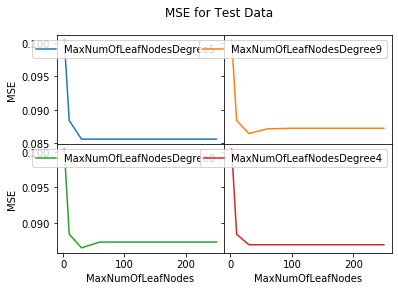

In [71]:
# Remember to run function: def DecisionTreeAnalyzor(depth,parameter,MinSampleSplit,MaxNumOfLeafNodes,Xdata,Ydata)
# before running the below cell.

def plotfun(data,parameter):
    mse,r2 = j
    if parameter == 'MinSampleSplit':
        Component = MinSampleSplit
    else:
        Component = MaxNumOfLeafNodes
    #Just Create Arrays
    mseDegree1 = np.array(mse[0:len(Component)])
    mseDegree9 = np.array(mse[len(Component)*8:len(Component)*9])
    mseDegree8 = np.array(mse[len(Component)*7:len(Component)*8])
    mseDegree4 = np.array(mse[len(Component)*3:len(Component)*4])
    mseDegree5 = np.array(mse[len(Component)*4:len(Component)*5])
    fig, axs = plt.subplots(2, 2, sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0})
    (ax1, ax2), (ax3, ax4) = axs
    if data == 'Test':
        fig.suptitle('MSE for Test Data')
    else:
        fig.suptitle('MSE for Train Data')
    if parameter == 'MinSampleSplit':
        ax1.plot(Component,-mseDegree5,label='MinSampleSplitDegree5')
        ax1.legend()
        ax1.set_xlabel('MinSampleSplit')
        ax1.set_ylabel('MSE')
        ax2.plot(Component,-mseDegree9, 'tab:orange',label='MinSampleSplitDegree9')
        ax2.legend()
        ax2.set_xlabel('MinSampleSplit')
        ax2.set_ylabel('MSE')
        ax3.plot(Component,-mseDegree8, 'tab:green',label='MinSampleSplitDegree8')
        ax3.legend()
        ax3.set_xlabel('MinSampleSplit')
        ax3.set_ylabel('MSE')
        ax4.plot(Component,-mseDegree4, 'tab:red',label='MinSampleSplitDegree4')
        ax4.legend()
        ax4.set_xlabel('MinSampleSplit')
        ax4.set_ylabel('MSE')
        for ax in axs.flat:
            ax.label_outer()
    else:
        ax1.plot(Component,-mseDegree5,label='MaxNumOfLeafNodesDegree5')
        ax1.legend()
        ax1.set_xlabel('MaxNumOfLeafNodes')
        ax1.set_ylabel('MSE')
        ax2.plot(Component,-mseDegree9, 'tab:orange',label='MaxNumOfLeafNodesDegree9')
        ax2.legend()
        ax2.set_xlabel('MaxNumOfLeafNodes')
        ax2.set_ylabel('MSE')
        ax3.plot(Component,-mseDegree8, 'tab:green',label='MaxNumOfLeafNodesDegree8')
        ax3.legend()
        ax3.set_xlabel('MaxNumOfLeafNodes')
        ax3.set_ylabel('MSE')
        ax4.plot(Component,-mseDegree4, 'tab:red',label='MaxNumOfLeafNodesDegree4')
        ax4.legend()
        ax4.set_xlabel('MaxNumOfLeafNodes')
        ax4.set_ylabel('MSE')
        for ax in axs.flat:
            ax.label_outer()

plotfun(('Test'),parameter)

In [72]:
def DecisionDepth(DataType,depth):
    mseDepth = []
    r2Depth = []
    for i in range(1,depth):
        model = DecisionTreeRegressor(max_depth = i,min_samples_split = 100,max_features=19,max_leaf_nodes = 100,min_weight_fraction_leaf=0.001,random_state=42)
        model.fit(XTrain,yTrain)
        if DataType == 'Train':
            score = cross_val_score(model,XTrain,yTrain,cv=5,scoring='r2')
        else:
            score = cross_val_score(model,XTest,yTest,cv=5,scoring='r2')
        r2Score = np.mean(score)
        r2Depth.append(np.mean(score))
        # Also here, we calculate the MSE. Differentiate between training or Test data
        if DataType == 'Train':
            mseScore=cross_val_score(model,XTrain,yTrain,cv=5,scoring='neg_mean_squared_error')
        elif DataType =='Test':
            mseScore=cross_val_score(model,XTest,yTest,cv=5,scoring='neg_mean_squared_error')
        MSE = np.mean(mseScore)
        mseDepth.append(np.mean(mseScore)) # Make a list
    return mseDepth,r2Depth
f = DecisionDepth(('Train'),20)
g = DecisionDepth(('Test'),20)

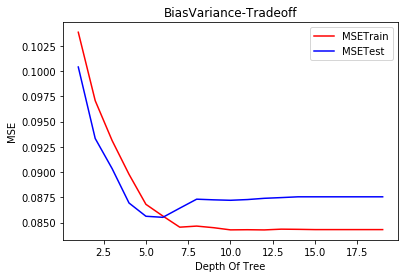

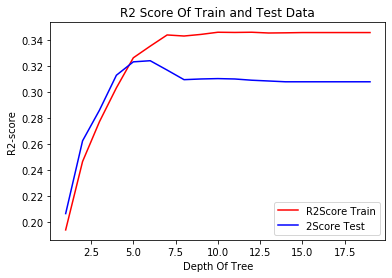

In [73]:


mseTrain,r2Train = f
mseTest,r2Test = g
mseTrain = np.array(mseTrain)
mseTest = np.array(mseTest)
x = range(1,20)
plt.figure(1)
plt.plot(x, -mseTrain, 'r',label='MSETrain') # plotting t, a separately
plt.legend()
plt.plot(x, -mseTest, 'b',label = 'MSETest') # plotting t, b separately 
plt.legend()
plt.xlabel('Depth Of Tree')
plt.ylabel('MSE')
plt.title('BiasVariance-Tradeoff')
plt.show()
plt.figure(2)
plt.plot(x, r2Train, 'r',label='R2Score Train') # plotting t, a separately
plt.legend()
plt.plot(x, r2Test, 'b',label = '2Score Test') # plotting t, b separately 
plt.legend()
plt.xlabel('Depth Of Tree')
plt.ylabel('R2-score')
plt.title('R2 Score Of Train and Test Data')
plt.show()

Feature ranking:
1. feature 2 (0.660372)
2. feature 1 (0.130372)
3. feature 8 (0.052086)
4. feature 6 (0.042107)
5. feature 14 (0.025423)
6. feature 0 (0.021620)
7. feature 17 (0.017591)
8. feature 13 (0.012723)
9. feature 4 (0.011645)
10. feature 3 (0.010714)
11. feature 9 (0.007096)
12. feature 16 (0.005102)
13. feature 15 (0.002721)
14. feature 18 (0.000427)
15. feature 7 (0.000000)
16. feature 10 (0.000000)
17. feature 5 (0.000000)
18. feature 11 (0.000000)
19. feature 12 (0.000000)


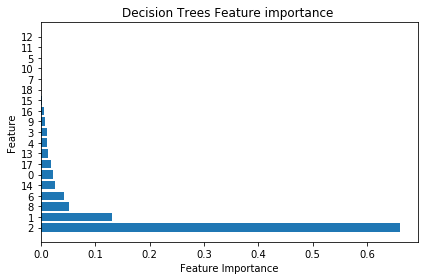

In [87]:
import seaborn as sns
# From above, use depth = 6 since train, and Test are lowest then. Also, use 100 for other paramets.
model = DecisionTreeRegressor(max_depth = 6,min_samples_split = 100,max_features=19,max_leaf_nodes = 100,min_weight_fraction_leaf=0.001,random_state=42)
model.fit(XTrain,yTrain)
feature_importances = model.feature_importances_

indices = np.argsort(feature_importances)[::-1]
# Print the feature ranking
print("Feature ranking:")
for f in range(XTrain.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], feature_importances[indices[f]]))

y_ticks = np.arange(0, len(feature_importances))
fig, ax = plt.subplots()
ax.barh(y_ticks, feature_importances[indices])
ax.set_yticklabels(indices)
ax.set_yticks(y_ticks)
ax.set_title("Decision Trees Feature importance ")
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
fig.tight_layout()
plt.show()


In [2]:
print(List)

NameError: name 'List' is not defined